## **Introduction**
Flair is one of the popular libraries for doing NLP based tasks. In this notebook, I would like to explain the different ways in which we could train NER - Entity Recognitio model in flair. Embeddings, play a very crucial role when training NLP models,One of the advantages of Flair is the easiness in which we can try different types of embeddings. It provides an additional feature to even stack embeddings. In this case, as it is NER we will exploring mostly Word Embeddings. When we are going for tasks such as Text Classification, Topic Modeling it would worth exploring their sentence embeddings as well. If you want to understand more about embeddings, please explore the medium blog,<https://medium.com/mysuperai/what-is-named-entity-recognition-ner-and-how-can-i-use-it-2b68cf6f545d>. We will first begin by installing flair

In [2]:
 !pip install --quiet flair

We will be first downloading the datasets to explain this functionality. I will be using the Japanese NER dataset that comes with Flair for this notebook.

In [3]:
from flair.data import Corpus
import flair.datasets
japanese_ner_corpus = flair.datasets.NER_JAPANESE()

In [3]:
label_dict = japanese_ner_corpus.make_label_dictionary(label_type='ner')

print('The number of training examples in the dataset are',len(japanese_ner_corpus.train))
print('The number of test examples in the dataset are',len(japanese_ner_corpus.test))
print('The first training example is', japanese_ner_corpus.train[0])

print('-------------------The tags in the dataset are----------------')
print(label_dict)

The first example, we will be using simple japanese embeddings that come with Flair. We will just training for 20 epochs and some standard learning rates. 

In [4]:

from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

# 1. what label do we want to predict?
label_type = 'ner'

# 2. make the label dictionary from the corpus
label_dict = japanese_ner_corpus.make_label_dictionary(label_type=label_type)

embeddings = WordEmbeddings('ja')

# 3. initialize sequence tagger
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_crf=True)

# 4. initialize trainer
trainer = ModelTrainer(tagger, japanese_ner_corpus)

# 5. start training
trainer.train(
    'resources/taggers/sota-ner-flair/ja',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=20)

At the end of 20 epochs, we have reached a F1 score of -.025. 

2021-12-02 16:35:11,355 ----------------------------------------------------------------------------------------------------
2021-12-02 16:35:11,367 WARNING: No LOSS found for test split in this data.
2021-12-02 16:35:11,370 Are you sure you want to plot LOSS and not another value?
2021-12-02 16:35:11,372 ----------------------------------------------------------------------------------------------------
2021-12-02 16:35:11,563 ----------------------------------------------------------------------------------------------------
2021-12-02 16:35:11,564 WARNING: No F1 found for test split in this data.
2021-12-02 16:35:11,566 Are you sure you want to plot F1 and not another value?
2021-12-02 16:35:11,568 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in kaggle\working\resources\taggers\sota-ner-flair\ja\training.png


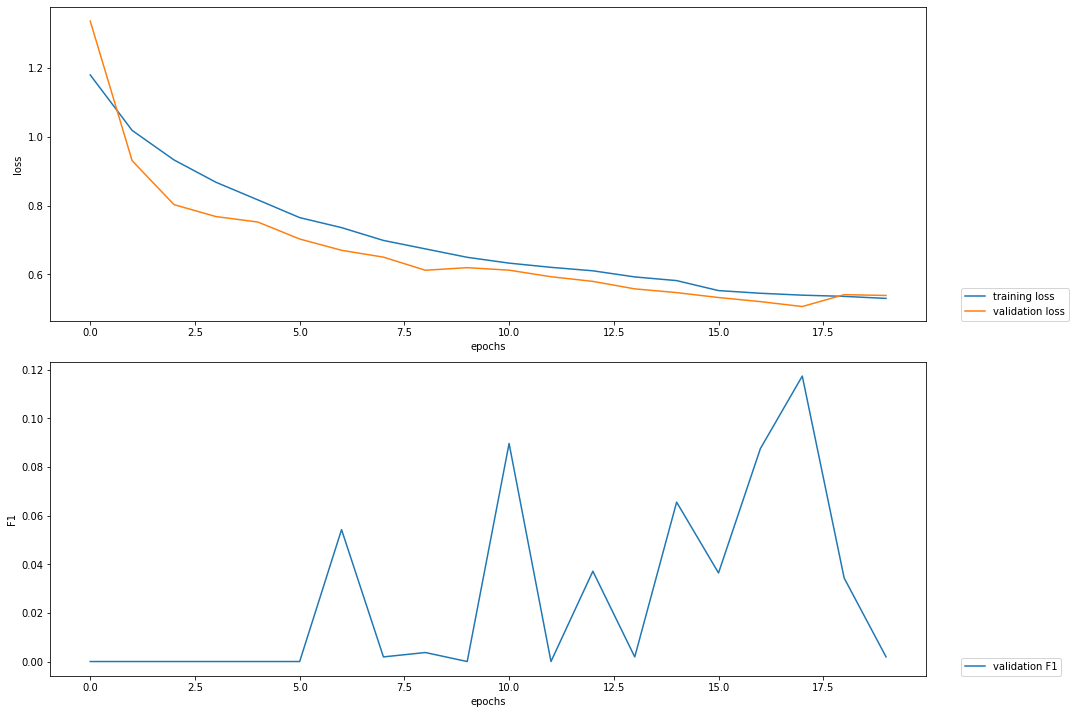

In [4]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('./kaggle/working/resources/taggers/sota-ner-flair/ja/loss.tsv')
# plotter.plot_weights('/kaggle/working/resources/taggers/sota-ner-flair/ja/weights.txt')

In [9]:
from flair.datasets import CONLL_03
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

# 2. what label do we want to predict?
label_type = 'ner'

# 3. make the label dictionary from the corpus
label_dict = japanese_ner_corpus.make_label_dictionary(label_type=label_type)

embeddings = WordEmbeddings('ja-crawl')

# 5. initialize sequence tagger
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_crf=True)

# 6. initialize trainer
trainer = ModelTrainer(tagger, japanese_ner_corpus)

# 7. start training
trainer.train('resources/taggers/sota-ner-flair/ja-crawl',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=20,write_weights=True)


Here when using the ja-crawl embeddings we were able to reach a F1 score of 0.64 within 20 epochs. 

2021-12-02 16:35:29,803 ----------------------------------------------------------------------------------------------------
2021-12-02 16:35:29,804 WARNING: No LOSS found for test split in this data.
2021-12-02 16:35:29,805 Are you sure you want to plot LOSS and not another value?
2021-12-02 16:35:29,807 ----------------------------------------------------------------------------------------------------
2021-12-02 16:35:29,870 ----------------------------------------------------------------------------------------------------
2021-12-02 16:35:29,871 WARNING: No F1 found for test split in this data.
2021-12-02 16:35:29,874 Are you sure you want to plot F1 and not another value?
2021-12-02 16:35:29,876 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in kaggle\working\resources\taggers\sota-ner-flair\ja-crawl\training.png


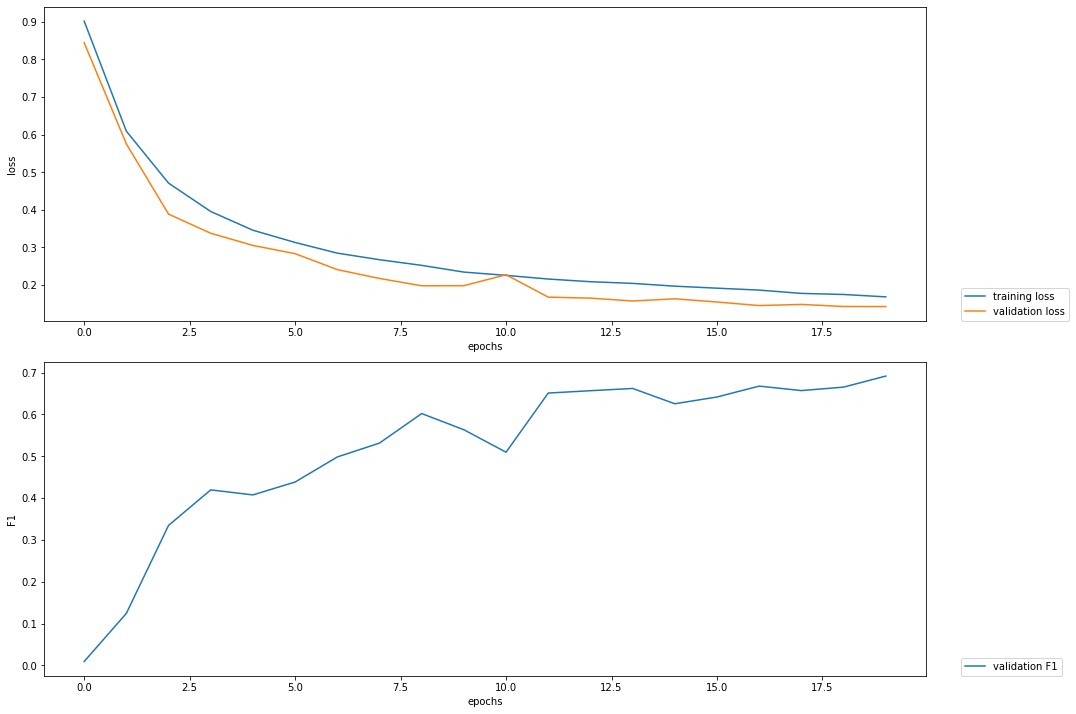

In [5]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('./kaggle/working/resources/taggers/sota-ner-flair/ja-crawl/loss.tsv')
# plotter.plot_weights('/kaggle/working/resources/taggers/sota-ner-flair/ja-crawl/weights.txt')

In [4]:
from flair.datasets import CONLL_03
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

# # 1. get the corpus
# corpus = CONLL_03()
# print(corpus)

# 2. what label do we want to predict?
label_type = 'ner'

# 3. make the label dictionary from the corpus
label_dict = japanese_ner_corpus.make_label_dictionary(label_type=label_type)

# 4. initialize embedding stack with Flair and GloVe
embedding_types = [
    WordEmbeddings('ja'),
    FlairEmbeddings('multi-forward'),
    FlairEmbeddings('multi-backward')
]

embeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_crf=True)

# 6. initialize trainer
trainer = ModelTrainer(tagger, japanese_ner_corpus)

# 7. start training
trainer.train('resources/taggers/sota-ner-flair/ja-stacked',
              learning_rate=0.1,
              mini_batch_size=32,
            max_epochs=20)

Stacking flair embedding on top of ja gave us better F1 score.

2021-12-02 16:36:03,447 ----------------------------------------------------------------------------------------------------
2021-12-02 16:36:03,448 WARNING: No LOSS found for test split in this data.
2021-12-02 16:36:03,449 Are you sure you want to plot LOSS and not another value?
2021-12-02 16:36:03,451 ----------------------------------------------------------------------------------------------------
2021-12-02 16:36:03,510 ----------------------------------------------------------------------------------------------------
2021-12-02 16:36:03,512 WARNING: No F1 found for test split in this data.
2021-12-02 16:36:03,516 Are you sure you want to plot F1 and not another value?
2021-12-02 16:36:03,517 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in kaggle\working\resources\taggers\sota-ner-flair\ja-stacked\training.png


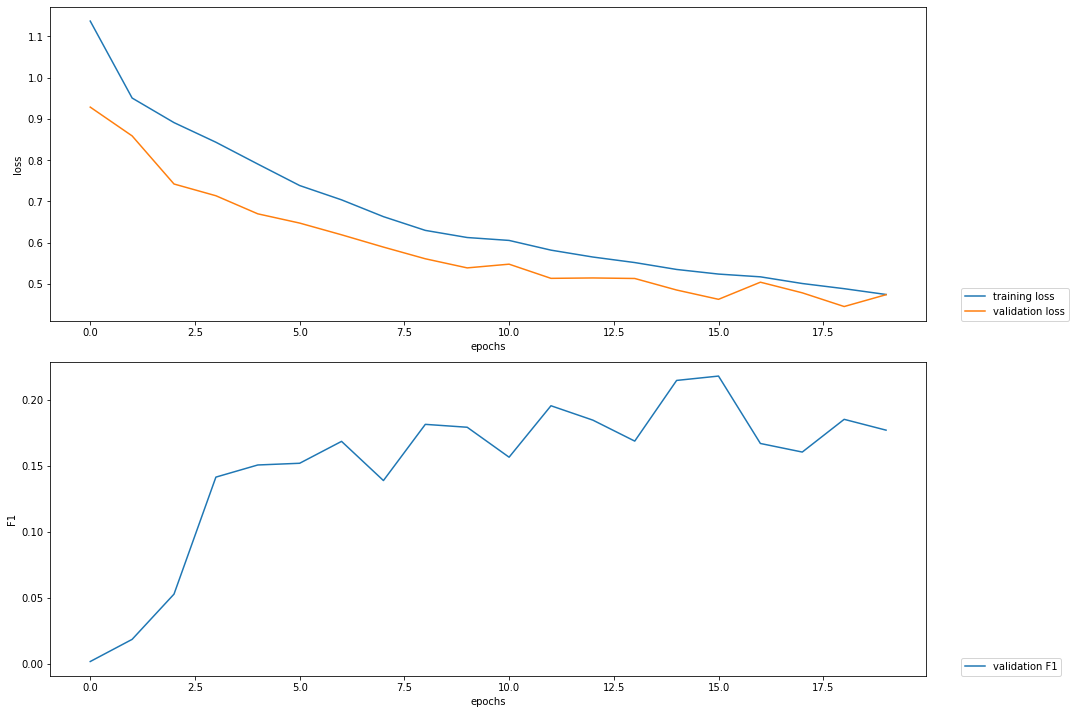

In [6]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('./kaggle/working/resources/taggers/sota-ner-flair/ja-stacked/loss.tsv')
# plotter.plot_weights('/kaggle/working/resources/taggers/sota-ner-flair/ja-crawl/weights.txt')

In [6]:
from flair.datasets import CONLL_03
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

# # 1. get the corpus
# corpus = CONLL_03()
# print(corpus)

# 2. what label do we want to predict?
label_type = 'ner'

# 3. make the label dictionary from the corpus
label_dict = japanese_ner_corpus.make_label_dictionary(label_type=label_type)

# 4. initialize embedding stack with Flair and GloVe
embedding_types = [
    WordEmbeddings('ja-crawl'),
    FlairEmbeddings('multi-forward'),
    FlairEmbeddings('multi-backward')
]

embeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_crf=True)

# 6. initialize trainer
trainer = ModelTrainer(tagger, japanese_ner_corpus)

# 7. start training
trainer.train('resources/taggers/sota-ner-flair/ja-crawl-stacked',
              learning_rate=0.1,
              mini_batch_size=32,
            max_epochs=20)

2021-12-02 16:36:41,049 ----------------------------------------------------------------------------------------------------
2021-12-02 16:36:41,051 WARNING: No LOSS found for test split in this data.
2021-12-02 16:36:41,052 Are you sure you want to plot LOSS and not another value?
2021-12-02 16:36:41,054 ----------------------------------------------------------------------------------------------------
2021-12-02 16:36:41,091 ----------------------------------------------------------------------------------------------------
2021-12-02 16:36:41,092 WARNING: No F1 found for test split in this data.
2021-12-02 16:36:41,093 Are you sure you want to plot F1 and not another value?
2021-12-02 16:36:41,094 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in kaggle\working\resources\taggers\sota-ner-flair\ja-crawl-stacked\training.png


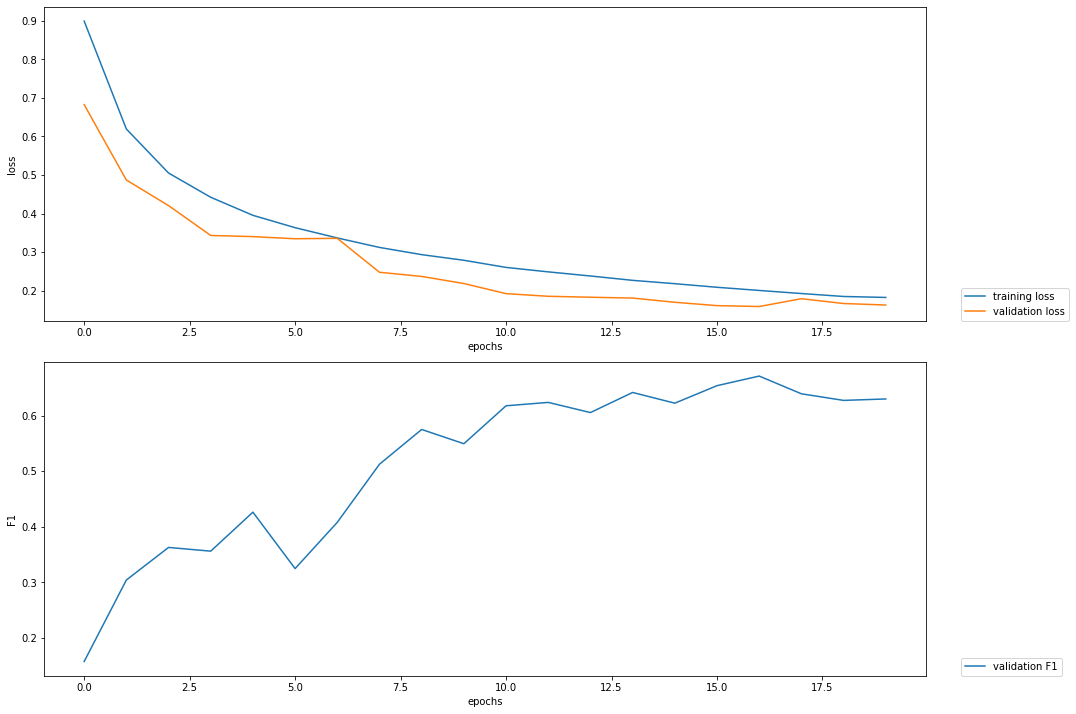

In [7]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('./kaggle/working/resources/taggers/sota-ner-flair/ja-crawl-stacked/loss.tsv')
# plotter.plot_weights('/kaggle/working/resources/taggers/sota-ner-flair/ja-crawl/weights.txt')

In [1]:
from flair.datasets import CONLL_03
from flair.embeddings import TransformerWordEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer


# 2. what label do we want to predict?
label_type = 'ner'

# 3. make the label dictionary from the corpus
label_dict = japanese_ner_corpus.make_label_dictionary(label_type=label_type)

# 4. initialize fine-tuneable transformer embeddings WITH document context
embeddings = TransformerWordEmbeddings(model='xlm-roberta-large',
                                       layers="-1",
                                       subtoken_pooling="first",
                                       fine_tune=True,
                                       use_context=True,
                                       )

# 5. initialize bare-bones sequence tagger (no CRF, no RNN, no reprojection)
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type='ner',
                        use_crf=False,
                        use_rnn=False,
                        reproject_embeddings=False,
                        )

# 6. initialize trainer
trainer = ModelTrainer(tagger, japanese_ner_corpus)

# 7. run fine-tuning
trainer.fine_tune('resources/taggers/sota-ner-flert',
                  learning_rate=5.0e-6,
                  mini_batch_size=4,
                  mini_batch_chunk_size=1# remove this parameter to speed up computation if you have a big GPU
                  )
